ALL IMPORTS

In [1]:
import boto3
import os
import shutil
import pandas as pd
from datetime import datetime

### VARIABLES TO BE DEFINED
Also, script requries user to create the folder with the COMPANY name

VLKAF = Volkswagen AG
https://www.nasdaq.com/market-activity/stocks/vlkaf

BAMXF = Bayerische Motoren Werke AG
https://www.nasdaq.com/market-activity/stocks/bamxf

BP = BP p.l.c. Common Stock (BP)
https://www.nasdaq.com/market-activity/stocks/bp

In [2]:
STARTING_YEAR = '2008'
ENDING_YEAR = '2021'
COMPANY = 'VLKAF'

### PREPARE VARIABLES AND DIRECTORIES

In [3]:
YEARS = []
YEAR = int(STARTING_YEAR)
END_YEAR = int(ENDING_YEAR)
while (YEAR <= END_YEAR):
    YEARS.append('{0}'.format(YEAR))
    YEAR+=1
print(YEARS)    

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


Delete company file and its content (leftovers from the testing phase)

### AGGREGATE DATA

In [14]:
%%time
for year in YEARS: 
    df = pd.read_csv('{0}/{0}{1}.csv'.format(COMPANY, year), 
                     index_col='timestamp', 
                     usecols=['timestamp', 'price', 'shares', 'salescondition', 'mktcenter', 'submkt'], 
                     dtype={"price": "float64", "shares": "int", "salescondition": "str", "mktcenter": "str", "submkt": "str"})
    df.index = df.index.sort_values()
    df.index = pd.to_datetime(df.index)
    df = df.groupby([df.index.year.values, df.index.month.values, df.index.day.values]).apply(pd.Series.tail,1)
    df.to_csv('{0}/{0}{1}aggregated_daily.csv'.format(COMPANY, year))

Wall time: 1.61 s


In [15]:
df

mktcenter     price  shares salescondition  \
          timestamp                                                            
2021 1 4  2021-01-04 15:52:28.585         u  341.0000       2           @      
       5  2021-01-05 15:45:38.925         u  340.5000      10           @  P   
       6  2021-01-06 15:39:00.333         u  365.0000       4           @      
       7  2021-01-07 15:48:00.917         u  394.5700       5           @      
       8  2021-01-08 15:56:30.619         u  384.2500     109           @      
...                                     ...       ...     ...            ...   
     7 23 2021-07-23 15:36:55.416         u  292.0000       1           @      
       26 2021-07-26 15:56:38.489         u  220.5000      15           @      
       27 2021-07-27 15:32:52.803         u  216.0000       1           @      
       28 2021-07-28 15:54:58.119         u  214.0137       4           @      
       29 2021-07-29 15:34:36.353         u  330.1200      35           @      

                                  submkt  
          timestamp                       
2021 1 4  2021-01-04 15:52:28.585    NaN  
       5  2021-01-05 15:45:38.925    NaN  
       6  2021-01-06 15:39:00.333    NaN  
       7  2021-01-07 15:48:00.917    NaN  
       8  2021-01-08 15:56:30.619    NaN  
...                                  ...  
     7 23 2021-07-23 15:36:55.416    NaN  
       26 2021-07-26 15:56:38.489    NaN  
       27 2021-07-27 15:32:52.803    NaN  
       28 2021-07-28 15:54:58.119    NaN  
       29 2021-07-29 15:34:36.353    NaN  

[144 rows x 5 columns]

## ------------------- HERE IT STARTS ------------------------- ##
### AGGREGATE DATA using all columns, then drop unnecessary ones, then clean the data and perform EDA

In [51]:
%%time
for year in YEARS: 
    df = pd.read_csv('{0}/{0}{1}.csv'.format(COMPANY, year), 
                     index_col='timestamp', 
                     usecols=['timestamp', 'price', 'shares', 'salescondition', 'mktcenter', 'submkt', 'seqnum', 'canceled', 'dottchar', 'issuechar', 'msgseqnum', 'originalmsgseqnum'], 
                     dtype={"seqnum": "int64",
                            "price": "float64", 
                            "shares": "int64", 
                            "salescondition": "object",
                            "canceled": "bool",
                            "dottchar": "object",
                            "issuechar": "object",
                            "msgseqnum": "int",
                            "originalmsgseqnum": "int",
                            "mktcenter": "object", 
                            "submkt": "object"})
    df.index = df.index.sort_values()
    df.index = pd.to_datetime(df.index)
    df = df.groupby([df.index.year.values, df.index.month.values, df.index.day.values]).apply(pd.Series.tail,1)
    df.to_csv('{0}/{0}{1}aggregated_daily.csv'.format(COMPANY, year))

Wall time: 2.25 s


In [52]:
HEADER = ['year', 
          'month', 
          'day', 
          'timestamp', 
          'seqnum', 
          'mktcenter', 
          'price', 
          'shares', 
          'salescondition', 
          'canceled', 
          'dottchar', 
          'issuechar', 
          'msgseqnum', 
          'originalmsgseqnum', 
          'submkt']

In [53]:
first = True
for year in YEARS:
    df = pd.read_csv('{0}/{0}{1}aggregated_daily.csv'.format(COMPANY, year))
    if first: 
        df.to_csv('{0}daily.csv'.format(COMPANY), header=HEADER, index = False)
        first = False
    else:
        df.to_csv('{0}daily.csv'.format(COMPANY), mode='a', header=False, index = False)

In [55]:
df = pd.read_csv('{0}daily.csv'.format(COMPANY))
df

,year,month,day,timestamp,seqnum,mktcenter,price,shares,salescondition,canceled,dottchar,issuechar,msgseqnum,originalmsgseqnum,submkt
0,2008,10,27,2008-10-27 14:00:38,1121037,U,363.0000,50,@,False,F,?,4644,0,NaN
1,2008,10,28,2008-10-28 15:58:47,511170121,u,903.0000,40,@,False,F,S,27654,0,NaN
2,2008,10,29,2008-10-29 11:51:50,408314384,u,918.4300,10000,Z,False,F,S,22736,0,NaN
3,2008,10,31,2008-10-31 10:03:55,894147032,u,1000.0000,86,@,False,F,S,51258,0,NaN
4,2008,11,3,2008-11-03 09:32:21,388462522,u,864.0000,5,@,False,F,S,21725,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,2021,7,23,2021-07-23 15:36:55.416,41886656,u,292.0000,1,@,False,F,S,463541,0,NaN
2560,2021,7,26,2021-07-26 15:56:38.489,77399777,u,220.5000,15,@,False,F,S,1476697,0,NaN
2561,2021,7,27,2021-07-27 15:32:52.803,60054657,u,216.0000,1,@,False,F,S,710210,0,NaN
2562,2021,7,28,2021-07-28 15:54:58.119,21450823,u,214.0137,4,@,False,F,S,261639,0,NaN


In [59]:
df.describe()

,year,month,day,seqnum,price,shares,msgseqnum,originalmsgseqnum,submkt
count,2564.000000,2564.000000,2564.000000,2.564000e+03,2564.000000,2564.000000,2.564000e+03,2564.000000,0.0
mean,2015.609204,6.490640,15.733229,1.631935e+07,182.883106,128.548362,8.021212e+04,219.276911,NaN
std,3.417521,3.452751,8.795539,4.686896e+07,74.000728,951.210879,1.155985e+05,3583.495076,NaN
min,2008.000000,1.000000,1.000000,7.144000e+03,1.650000,1.000000,4.000000e+00,0.000000,NaN
25%,2013.000000,3.000000,8.000000,2.580193e+06,148.188750,7.000000,1.501375e+04,0.000000,NaN
50%,2016.000000,6.000000,16.000000,1.111765e+07,166.440000,25.000000,4.801400e+04,0.000000,NaN
75%,2019.000000,10.000000,23.000000,2.048704e+07,199.990000,100.000000,9.482050e+04,0.000000,NaN
max,2021.000000,12.000000,31.000000,1.028051e+09,1080.000000,32500.000000,1.476697e+06,99492.000000,NaN


In [60]:
df.shape

(2564, 15)

In [62]:
df.nunique()

year                   14
month                  12
day                    31
timestamp            2564
seqnum               2564
mktcenter               2
price                1766
shares                245
salescondition         13
canceled                2
dottchar                2
issuechar               2
msgseqnum            2537
originalmsgseqnum      17
submkt                  0
dtype: int64

In [64]:
df['mktcenter'].unique()

array(['U', 'u'], dtype=object)

In [78]:
df['salescondition'].unique()

array(['@   ', 'Z   ', 'T   ', 'U   ', 'R   ', 'W   ', 'N T ', 'R Z ',
       'R T ', '@  W', '@  P', '@ T ', '@ Z '], dtype=object)

In [79]:
df['salescondition'].value_counts()

@       2512
T         22
Z          7
R          4
U          4
@  P       3
W          3
R T        2
@ T        2
R Z        2
@ Z        1
N T        1
@  W       1
Name: salescondition, dtype: int64

In [66]:
df['canceled'].unique()

array([False,  True])

In [67]:
df['dottchar'].unique()

array(['F', 'T'], dtype=object)

In [68]:
df['issuechar'].unique()

array(['?', 'S'], dtype=object)

In [69]:
df['originalmsgseqnum'].unique()

array([    0, 22977, 22903, 58149, 61286, 58954,  6220,  6675,   242,
       53642,  5307,    70, 56820, 99492, 23492, 20584, 65413],
      dtype=int64)

In [70]:
df['submkt'].unique()

array([nan])

In [72]:
df.isnull().sum()

year                    0
month                   0
day                     0
timestamp               0
seqnum                  0
mktcenter               0
price                   0
shares                  0
salescondition          0
canceled                0
dottchar                0
issuechar               0
msgseqnum               0
originalmsgseqnum       0
submkt               2564
dtype: int64

### Data Description:
- <b>year</b>: given year, from 2008 to 2021 (14 years total)
- <b>month</b>: given month, 12 possible values
- <b>day</b>: given day, 31 possible values
- <b>timestamp</b>: original concatenation of year, month, day, and time of transaction. Should be dropped - no longer necessary.     
- <b>seqnum</b>: NASDAQ sequence number, different for every record. Should be dropped. 
- <b>mktcenter</b>: market center on which trade was executed. Every value should be made uppercase. Possible values: 
    - 'U' = 
- <b>price</b>: price at which the trade was executed. 
- <b>shares</b>: quantity, number of shares for which the trade was executed. 
- <b>salescondition</b>: sales condition. All white spaces should be deleted. Possible values: 
    - '@   ' = Regular settlement
    - 'C' = Cash settlement
    - 'N' = Next day settlement
    - 'R' = Seller settlement
    - 'Z   ' = Sold – Out of Sequence
    - 'T   ' = Extended Hours Trade (documentation page 8)
    - 'U   ' = Extended Hours Trade – Reported Late or Out of Sequence (documentation page 8)
    - 'W   ' = Weighted Average Price
    - 'N T ' = is an error or concatenation of both selling conditions? There is 12 cases at all of 2 symbols. 
    - 'R Z ',
    - 'R T ', 
    - '@  W', 
    - '@  P', 
    - '@ T ', 
    - '@ Z '
    - '<space\>': not applicable (delete)
- <b>canceled</b>: indicates if trade was canceled. Is boolean - True or False. Almost always is False.
- <b>dottchar</b>: DOTT character. Can be either 'F' or 'T'. Does it mean True and False?
    - 'F' = 
    - 'T' = 
- <b>issuechar</b>: can be either '?', 'S', or 'C'.
    - 'S' = System Event Message
    - 'C' = 
    - '?' = 
- <b>msgseqnum</b>: NASDAQ message sequence number, different for most of the records (2537 out of 2564). Should be dropped.   
- <b>originalmsgseqnum</b>: NASDAQ original message sequence number. Should be dropped.
- <b>submkt</b>: sub market center. Usually is empty, null. 

##### Sources: 
 - NASDAQ data on demand official documentation (https://dataondemand.nasdaq.com/docs/index.html#trades)
 - NASDAQ documentation from internet (http://www.nasdaqtrader.com/content/technicalsupport/specifications/dataproducts/nqlastsalespec.pdf)

In [80]:
df = df.drop(['timestamp', 'seqnum', 'msgseqnum', 'originalmsgseqnum', 'submkt'], axis = 1)
df

,year,month,day,mktcenter,price,shares,salescondition,canceled,dottchar,issuechar
0,2008,10,27,U,363.0000,50,@,False,F,?
1,2008,10,28,u,903.0000,40,@,False,F,S
2,2008,10,29,u,918.4300,10000,Z,False,F,S
3,2008,10,31,u,1000.0000,86,@,False,F,S
4,2008,11,3,u,864.0000,5,@,False,F,S
...,...,...,...,...,...,...,...,...,...,...
2559,2021,7,23,u,292.0000,1,@,False,F,S
2560,2021,7,26,u,220.5000,15,@,False,F,S
2561,2021,7,27,u,216.0000,1,@,False,F,S
2562,2021,7,28,u,214.0137,4,@,False,F,S


## ------------------- HERE IT ENDS ------------------------- ##

### Load aggregated data
Data was aggregated monthly

In [16]:
HEADER = ['year', 'month', 'day', 'timestamp', 'mktcenter', 'price', 'shares', 'salescondition', 'submkt']

In [17]:
first = True
for year in YEARS:
    df = pd.read_csv('{0}/{0}{1}aggregated_daily.csv'.format(COMPANY, year))
    if first: 
        df.to_csv('{0}daily.csv'.format(COMPANY), header=HEADER, index = False)
        first = False
    else:
        df.to_csv('{0}daily.csv'.format(COMPANY), mode='a', header=False, index = False)

## Clean aggregated data

In [39]:
df = pd.read_csv('{0}daily.csv'.format(COMPANY))

In [40]:
df

,year,month,day,timestamp,mktcenter,price,shares,salescondition,submkt
0,2008,10,27,2008-10-27 14:00:38,U,363.0000,50,@,NaN
1,2008,10,28,2008-10-28 15:58:47,U,903.0000,40,@,NaN
2,2008,10,29,2008-10-29 11:51:50,U,918.4300,10000,Z,NaN
3,2008,10,31,2008-10-31 10:03:55,U,1000.0000,86,@,NaN
4,2008,11,3,2008-11-03 09:32:21,U,864.0000,5,@,NaN
...,...,...,...,...,...,...,...,...,...
2559,2021,7,23,2021-07-23 15:36:55.416,U,292.0000,1,@,NaN
2560,2021,7,26,2021-07-26 15:56:38.489,U,220.5000,15,@,NaN
2561,2021,7,27,2021-07-27 15:32:52.803,U,216.0000,1,@,NaN
2562,2021,7,28,2021-07-28 15:54:58.119,U,214.0137,4,@,NaN


In [41]:
df.dtypes

year                int64
month               int64
day                 int64
timestamp          object
mktcenter          object
price             float64
shares              int64
salescondition     object
submkt            float64
dtype: object

In [42]:
df['mktcenter'] = df['mktcenter'].str.upper()

In [47]:
df

,year,month,day,timestamp,mktcenter,price,shares,salescondition,submkt
0,2008,10,27,2008-10-27 14:00:38,U,363.0000,50,@,NaN
1,2008,10,28,2008-10-28 15:58:47,U,903.0000,40,@,NaN
2,2008,10,29,2008-10-29 11:51:50,U,918.4300,10000,Z,NaN
3,2008,10,31,2008-10-31 10:03:55,U,1000.0000,86,@,NaN
4,2008,11,3,2008-11-03 09:32:21,U,864.0000,5,@,NaN
...,...,...,...,...,...,...,...,...,...
2559,2021,7,23,2021-07-23 15:36:55.416,U,292.0000,1,@,NaN
2560,2021,7,26,2021-07-26 15:56:38.489,U,220.5000,15,@,NaN
2561,2021,7,27,2021-07-27 15:32:52.803,U,216.0000,1,@,NaN
2562,2021,7,28,2021-07-28 15:54:58.119,U,214.0137,4,@,NaN


In [48]:
df['salescondition'] = df['salescondition'].replace('   ', '')

In [49]:
df.head(50)

,year,month,day,timestamp,mktcenter,price,shares,salescondition,submkt
0,2008,10,27,2008-10-27 14:00:38,U,363.0000,50,@,NaN
1,2008,10,28,2008-10-28 15:58:47,U,903.0000,40,@,NaN
2,2008,10,29,2008-10-29 11:51:50,U,918.4300,10000,Z,NaN
3,2008,10,31,2008-10-31 10:03:55,U,1000.0000,86,@,NaN
4,2008,11,3,2008-11-03 09:32:21,U,864.0000,5,@,NaN
5,2008,11,4,2008-11-04 09:33:00,U,840.0000,65,@,NaN
6,2008,11,6,2008-11-06 10:14:32,U,840.0000,65,@,NaN
7,2008,11,12,2008-11-12 11:22:12,U,1050.0000,160,@,NaN
8,2008,11,21,2008-11-21 13:34:21,U,1080.0000,47,@,NaN
9,2008,11,28,2008-11-28 09:42:34,U,1000.0000,4,@,NaN


In [50]:
df.to_csv('{0}daily.csv'.format(COMPANY), header=HEADER, index = False)

### Having aggregated data, create charts
Now, data is in one csv file

In [116]:
df = pd.read_csv('{0}monthly.csv'.format(COMPANY))
df

,year,month,timestamp,price
0,2008,10,2008-10-31 14:58:42,29.9000
1,2008,11,2008-11-28 12:15:21,26.3500
2,2008,12,2008-12-30 12:10:21,28.0500
3,2009,1,2009-01-30 15:24:08,23.9700
4,2009,2,2009-02-27 15:01:23,25.0000
...,...,...,...,...
149,2021,3,2021-03-31 11:46:11.946,103.6300
150,2021,4,2021-04-30 11:54:00.816,108.1000
151,2021,5,2021-05-28 14:06:39.580,86.8474
152,2021,6,2021-06-30 15:02:36.589,109.0000


#### Drop last observation - July has not ended yet

In [117]:
df.drop(index=df.index[-1:], axis=0, inplace=True)
df

,year,month,timestamp,price
0,2008,10,2008-10-31 14:58:42,29.9000
1,2008,11,2008-11-28 12:15:21,26.3500
2,2008,12,2008-12-30 12:10:21,28.0500
3,2009,1,2009-01-30 15:24:08,23.9700
4,2009,2,2009-02-27 15:01:23,25.0000
...,...,...,...,...
148,2021,2,2021-02-26 15:37:57.916,86.7740
149,2021,3,2021-03-31 11:46:11.946,103.6300
150,2021,4,2021-04-30 11:54:00.816,108.1000
151,2021,5,2021-05-28 14:06:39.580,86.8474


In [118]:
df.set_index('timestamp', inplace=True)
df.index = pd.to_datetime(df.index)
df

,year,month,price
timestamp,,,
2008-10-31 14:58:42.000,2008,10,29.9000
2008-11-28 12:15:21.000,2008,11,26.3500
2008-12-30 12:10:21.000,2008,12,28.0500
2009-01-30 15:24:08.000,2009,1,23.9700
2009-02-27 15:01:23.000,2009,2,25.0000
...,...,...,...
2021-02-26 15:37:57.916,2021,2,86.7740
2021-03-31 11:46:11.946,2021,3,103.6300
2021-04-30 11:54:00.816,2021,4,108.1000


In [119]:
df.index

DatetimeIndex([       '2008-10-31 14:58:42',        '2008-11-28 12:15:21',
                      '2008-12-30 12:10:21',        '2009-01-30 15:24:08',
                      '2009-02-27 15:01:23',        '2009-03-31 11:50:53',
                      '2009-04-30 11:35:36',        '2009-05-29 15:24:41',
                      '2009-06-29 13:34:24',        '2009-07-31 13:24:32',
               ...
               '2020-09-30 13:39:50.070000', '2020-10-30 15:14:33.991000',
               '2020-11-30 15:45:34.272000', '2020-12-31 15:50:48.346000',
               '2021-01-29 15:51:49.010000', '2021-02-26 15:37:57.916000',
               '2021-03-31 11:46:11.946000', '2021-04-30 11:54:00.816000',
               '2021-05-28 14:06:39.580000', '2021-06-30 15:02:36.589000'],
              dtype='datetime64[ns]', name='timestamp', length=153, freq=None)

### VISUALISATIONS

In [120]:
import matplotlib.pyplot as plt

In [121]:
display(plt.style.available)
#fivethirtyeight
#seaborn-bright
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-bright')

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

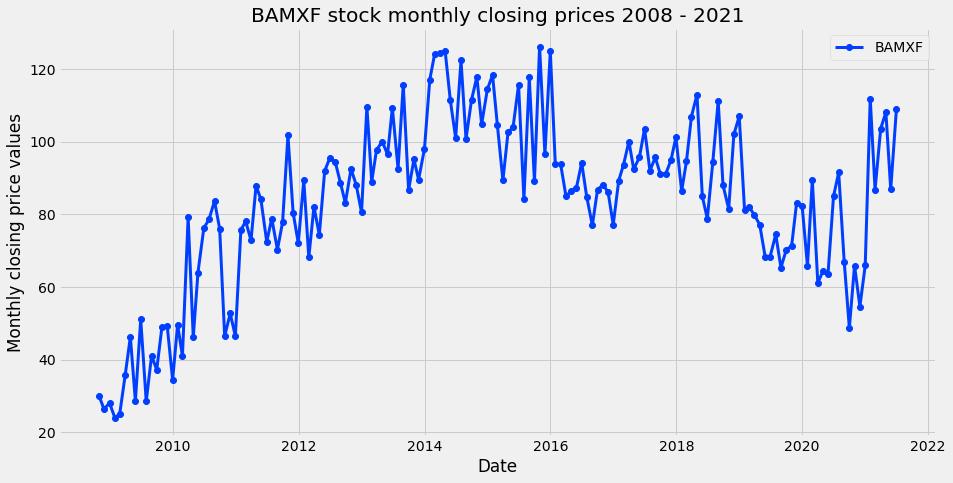

In [122]:
plt.figure(figsize=(14, 7))
plt.plot_date(df.index, df['price'], linewidth=3, linestyle='solid')
#plt.tight_layout()
plt.title('{0} stock monthly closing prices {1} - {2}'.format(COMPANY, STARTING_YEAR, ENDING_YEAR))
plt.xlabel('Date')
plt.ylabel('Monthly closing price values')
plt.legend(['{0}'.format(COMPANY)]) # 'IBM', 'PFE', 'BAC', 'CSCO', 'CVX', 'HD'
plt.savefig('{0}_monthly_closing_prices.png'.format(COMPANY));
plt.show()

In [123]:
end_time = datetime.now()
execution_time = end_time - start_time
print('Duration: {} h:min:s.milis'.format(execution_time))

Duration: 11:06:30.268704 h:min:s.milis


In [124]:
# Open a file with access mode 'a'
with open("ScriptExecutionTimes.txt", "a") as file_object:
    # Append at the end of file
    file_object.write('{0} execution time duration: {1} h:min:s.milis\n'.format(COMPANY, execution_time))